# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Note:** This notebook was generated with the assistance of AI. Use caution when interpreting the code or results. Review and validate any findings independently.

## Overview

This notebook introduces and demonstrates how to explore data from [Dandiset 001195](https://dandiarchive.org/dandiset/001195/0.250408.1733):

> Keyes, Laurel; Lee, Christopher R.; Wichmann, Romy; Matthews, Gillian A.; Tye, Kay M. (2025)  
> Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State  
> [https://dandiarchive.org/dandiset/001195/0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733)

This Dandiset contains in vivo and ex vivo neuroscience data collected in mice, particularly ex vivo patch-clamp electrophysiology and associated session metadata.  
The data is organized in Neurodata Without Borders (NWB) format and includes current and voltage clamp recordings, as well as detailed stimulus protocols for each cell.

## What this notebook covers

- Introduction to the Dandiset and overview of data types.
- How to programmatically list and explore asset (file) names using the DANDI API.
- How to stream and load NWB files for exploration using `pynwb` and `remfile` (no local downloads needed).
- How to identify and visualize current clamp and voltage clamp sweeps—both responses and command waveforms.
- Tips for understanding the organizational structure of the data.

**Note:** This particular NWB file (as in this example) does not contain calcium imaging or behavioral video data. For those modalities, you would need to explore other files in this Dandiset.

## Required Packages

To run this notebook, you will need the following packages (assumed to already be installed in your environment):

- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `matplotlib`
- `numpy`

All data access is performed remotely, and NWB files are read via streaming.

In [1]:
# Imports used throughout the notebook
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
import matplotlib.pyplot as plt
import numpy as np

## List NWB Files in Dandiset 001195

We'll use the DANDI API to list representative NWB files found in this dandiset.  
This helps orient you to the available data assets.

In [2]:
# Use the DANDI API to list several NWB files from this dandiset
dandiset_id = "001195"
dandiset_version = "0.250408.1733"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List the first 10 NWB files as representatives
from itertools import islice

assets = dandiset.get_assets_by_glob("*.nwb")
representative_files = [asset.path for asset in islice(assets, 10)]

print("Representative NWB files in this Dandiset:")
for path in representative_files:
    print("-", path)

Representative NWB files in this Dandiset:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb
- sub-235/sub-235_ses-20200921T150553_slice-slice-1_cell-C5_icephys.nwb
- sub-235/sub-235_ses-20200921T131057_slice-slice-1_cell-C1_icephys.nwb
- sub-235/sub-235_ses-20200921T164032_slice-slice-2_cell-C8_icephys.nwb
- sub-235/sub-235_ses-20200921T134852_slice-slice-1_cell-C2_icephys.nwb
- sub-235/sub-235_ses-20200921T172736_slice-slice-2_cell-C10_icephys.nwb


## Select an Example NWB File

For the demonstrations below, we'll use the following NWB file, which contains ex vivo patch-clamp electrophysiology from a single cell:

```
sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
```
We'll load this file directly from the DANDI archive using remote streaming.

In [3]:
# Set file path and Dandiset information
asset_path = "sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb"

# Find and get this asset's download URL
asset = next(dandiset.get_assets_by_glob(asset_path))
download_url = asset.download_url
print("Download URL retrieved for NWB file.")

Download URL retrieved for NWB file.


## Inspect Available Data Modalities: Acquisition and Stimulus Series

Each NWB file contains sweeps/epochs for one or more modalities.
Here we list all acquisition series (response recordings) and stimulus series (command protocols) in our example file.

In [4]:
# Stream-load the NWB file from remote
remote_file = remfile.File(download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwbfile = io.read()

# List all acquisition and stimulus series
acq_list = list(nwbfile.acquisition.keys())
stim_list = list(nwbfile.stimulus.keys())

print("Acquisition series:")
for name in acq_list:
    print("-", name)

print("\nStimulus series:")
for name in stim_list:
    print("-", name)

Acquisition series:
- current_clamp-response-01-ch-0
- current_clamp-response-01-ch-1
- current_clamp-response-02-ch-0
- current_clamp-response-02-ch-1
- current_clamp-response-03-ch-0
- current_clamp-response-03-ch-1
- current_clamp-response-04-ch-0
- current_clamp-response-04-ch-1
- current_clamp-response-05-ch-0
- current_clamp-response-05-ch-1
- current_clamp-response-06-ch-0
- current_clamp-response-06-ch-1
- current_clamp-response-07-ch-0
- current_clamp-response-07-ch-1
- current_clamp-response-08-ch-0
- current_clamp-response-08-ch-1
- current_clamp-response-09-ch-0
- current_clamp-response-09-ch-1
- current_clamp-response-10-ch-0
- current_clamp-response-10-ch-1
- current_clamp-response-11-ch-0
- current_clamp-response-11-ch-1
- current_clamp-response-12-ch-0
- current_clamp-response-12-ch-1
- current_clamp-response-13-ch-0
- current_clamp-response-13-ch-1
- current_clamp-response-14-ch-0
- current_clamp-response-14-ch-1
- current_clamp-response-15-ch-0
- current_clamp-respons

## Visualize a Current Clamp Sweep

Next, we'll select a current clamp response ("current_clamp-response-01-ch-0") and the corresponding stimulus ("stimulus-01-ch-0").
We'll plot the full voltage response aligned with the current command protocol.

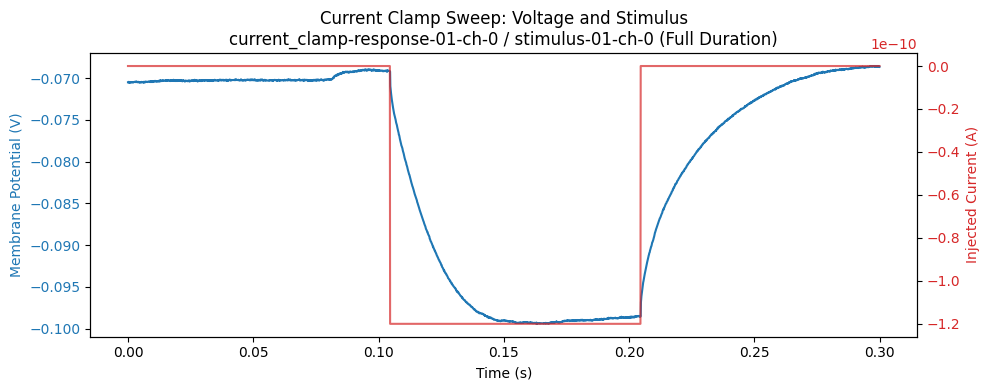

In [5]:
# Load and plot full trace for a current clamp sweep and its stimulus
resp = nwbfile.acquisition["current_clamp-response-01-ch-0"]
stim = nwbfile.stimulus["stimulus-01-ch-0"]

resp_data = resp.data[:] * resp.conversion  # volts
stim_data = stim.data[:] * stim.conversion  # amperes
rate = resp.rate  # Hz
N = len(resp_data)
t = (1.0 / rate) * np.arange(N)  # seconds

fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(t, resp_data, color=color, label='Membrane Potential (V)')
ax1.set_ylabel('Membrane Potential (V)', color=color)
ax1.set_xlabel('Time (s)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(t, stim_data, color=color, label='Injected Current (A)', alpha=0.7)
ax2.set_ylabel('Injected Current (A)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Current Clamp Sweep: Voltage and Stimulus\ncurrent_clamp-response-01-ch-0 / stimulus-01-ch-0 (Full Duration)')
plt.tight_layout()
plt.show()

## Visualize a Voltage Clamp Sweep

We'll now plot one voltage clamp response ("voltage_clamp-response-22-ch-0") and its associated command waveform ("stimulus-22-ch-0").
This allows inspection of the injected voltage protocol and the cell's membrane current response.

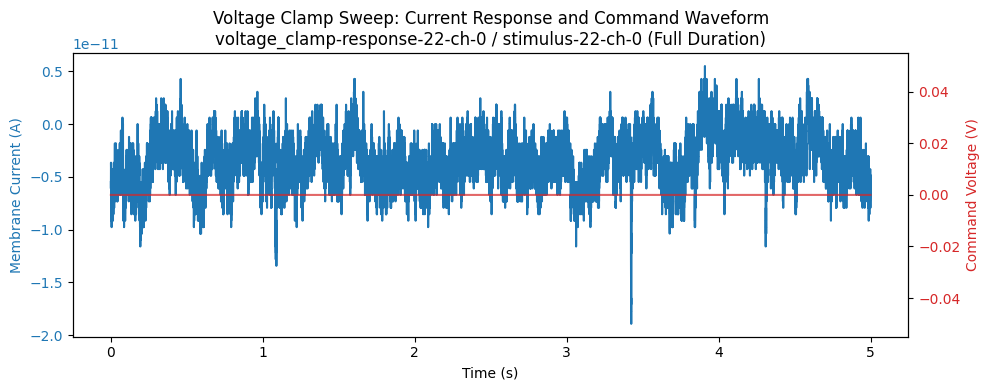

In [6]:
# Load and plot full trace for a voltage clamp sweep and its stimulus
# Note: The command may be nearly zero for this protocol!
vcrep = nwbfile.acquisition["voltage_clamp-response-22-ch-0"]
vcstim = nwbfile.stimulus["stimulus-22-ch-0"]

vcrep_data = vcrep.data[:] * vcrep.conversion  # amperes
vcstim_data = vcstim.data[:] * vcstim.conversion  # volts
rate = vcrep.rate
N = len(vcrep_data)
t = (1.0 / rate) * np.arange(N)

fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(t, vcrep_data, color=color, label='Membrane Current (A)')
ax1.set_ylabel('Membrane Current (A)', color=color)
ax1.set_xlabel('Time (s)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(t, vcstim_data, color=color, label='Command Voltage (V)', alpha=0.7)
ax2.set_ylabel('Command Voltage (V)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Voltage Clamp Sweep: Current Response and Command Waveform\nvoltage_clamp-response-22-ch-0 / stimulus-22-ch-0 (Full Duration)')
plt.tight_layout()
plt.show()

## Summary of Voltage Clamp Stimulus Protocols

Let's print out the descriptive annotations for all stimulus series (command waveforms), which helps identify files with particular protocols of interest.

In [7]:
# List all stimulus descriptions for voltage clamp protocols
print("Voltage clamp stimulus series and their descriptions:")
for k in stim_list:
    desc = nwbfile.stimulus[k].description
    print(f"{k}: {desc}")

Voltage clamp stimulus series and their descriptions:
stimulus-01-ch-0: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
stimulus-01-ch-1: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
stimulus-02-ch-0: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
stimulus-02-ch-1: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
stimulus-03-ch-0: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
stimulus-03-ch-1: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
stimulus-04-ch-0: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
stimulus-04-ch-1: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
stimulus-05-ch-0: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
stimulus-05-ch-1: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
stimul

## Notes on Other Data Modalities

This particular NWB file does **not** contain calcium imaging data or behavioral videos.
If you wish to explore those modalities, look for files in this dandiset possessing NWB entries related to imaging (such as `OnePhotonSeries`, or with "ophys" in the filename) or behavioral series.

The approach and code structure shown here can be adapted to those data types.

## Conclusion

This notebook introduced Dandiset 001195 and demonstrated how to:
- List assets using the DANDI API,
- Stream and open NWB files,
- Identify and visualize multiple types of electrophysiological recordings and stimulus protocols.

You are now equipped to begin exploring and reanalyzing the data in this resource!

For further data modalities or analysis, refer to the NWB documentation and DANDI resource pages.